# Slice stepout

In [1]:
from utils import *
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import pints.plot
from pints.functionaltests.slice_stepout import *

# Two dimensional Gaussian

In [17]:
test = run_replicates(np.geomspace(1000, 5000, 8), 10,
                      test_slice_stepout_on_two_dim_gaussian, parallel=True)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
# df.to_csv("experimental_data/slice_stepout_2d_gaussian.csv")

/auto/users/huiarm/PINTS/method-merge-tests/venv/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


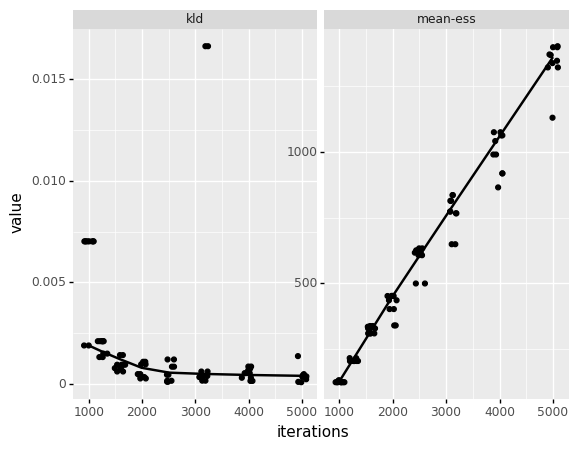

<ggplot: (8759683359392)>

In [18]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

The ESS and KLD both trend in the correct directions.

Show example run results.

Using Slice Sampling - Stepout
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     4       0:00.0
1     312     0:00.0
2     508     0:00.0
3     724     0:00.0
20    2020    0:00.0
40    3936    0:00.1
60    5820    0:00.1
80    7772    0:00.1
100   9836    0:00.2
120   11484   0:00.2
140   13276   0:00.2
160   14976   0:00.3
180   16656   0:00.3
200   18208   0:00.3
220   19920   0:00.4
240   21640   0:00.4
260   23500   0:00.4
280   25248   0:00.4
300   26888   0:00.5
320   28816   0:00.5
340   30644   0:00.5
360   32416   0:00.6
380   34012   0:00.6
400   35508   0:00.6
420   37372   0:00.7
440   39380   0:00.7
460   41120   0:00.7
480   42828   0:00.8
500   44600   0:00.8
520   46296   0:00.8
540   48220   0:00.9
560   49912   0:00.9
580   51516   0:00.9
600   53020   0:00.9
620   54656   0:01.0
640   56496   0:01.0
660   58204   0:01.0
680   60364   0:01.1
700   62164   0:01.1
720   64080   0:01.1
740   65808   0:01.2
760   67436   0:01.2
780   68856   0:0

7520  606405   0:10.7
7540  607285   0:10.7
7560  608189   0:10.7
7580  609053   0:10.8
7600  609951   0:10.8
7620  610891   0:10.8
7640  611665   0:10.8
7660  612521   0:10.8
7680  613405   0:10.8
7700  614365   0:10.9
7720  615185   0:10.9
7740  616031   0:10.9
7760  616879   0:10.9
7780  617907   0:10.9
7800  618841   0:10.9
7820  619699   0:11.0
7840  620487   0:11.0
7860  621325   0:11.0
7880  622105   0:11.0
7900  623109   0:11.0
7920  623975   0:11.0
7940  624861   0:11.1
7960  625651   0:11.1
7980  626417   0:11.1
8000  627281   0:11.1
8020  628087   0:11.1
8040  628889   0:11.1
8060  629881   0:11.2
8080  630739   0:11.2
8100  631521   0:11.2
8120  632499   0:11.2
8140  633311   0:11.2
8160  634043   0:11.2
8180  634851   0:11.3
8200  635751   0:11.3
8220  636661   0:11.3
8240  637467   0:11.3
8260  638217   0:11.3
8280  639077   0:11.3
8300  639869   0:11.3
8320  640781   0:11.4
8340  641627   0:11.4
8360  642525   0:11.4
8380  643231   0:11.4
8400  643874   0:11.4
8420  6443

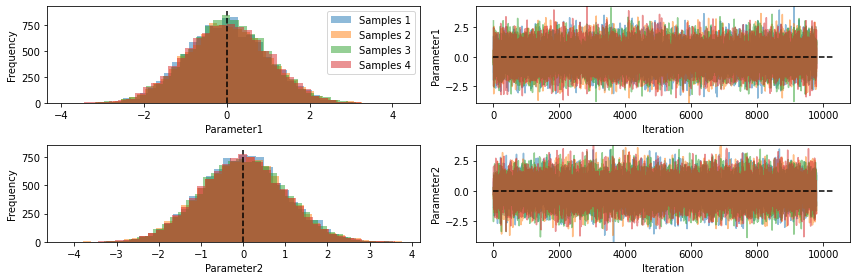

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess       ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  --------  --------------
param 1  0.00    1.00    -1.93   -0.67  -0.00  0.68   1.97     1.00    12409.57  1016.42
param 2  -0.01   1.01    -1.96   -0.70  -0.00  0.67   1.97     1.00    11990.61  982.11


In [19]:
n_chains = 4
n_iterations = 10000
n_warmup = 200
log_pdf = pints.toy.GaussianLogPDF(mean=[0, 0], sigma=[1, 1])

# Get initial parameters
log_prior = pints.ComposedLogPrior(
    pints.GaussianLogPrior(mean=0, sd=10),
    pints.GaussianLogPrior(mean=0, sd=10))
x0 = log_prior.sample(n=n_chains)
controller = pints.MCMCController(
            log_pdf, n_chains, x0, method=pints.SliceStepoutMCMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(True)

chains = controller.run()
chains = chains[:, n_warmup:]

# Show traces and histograms
pints.plot.trace(chains, ref_parameters=[0, 0])

# Show graphs
plt.show()

results = pints.MCMCSummary(chains=chains, time=controller.time())
print(results)

The parameters are close to their true means. How do they compare to MCMC eCDFs compare with the theoretical? Look pretty good.

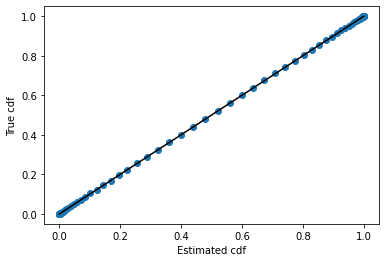

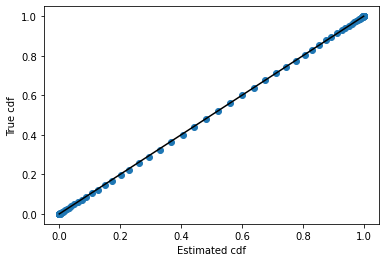

[None, None]

In [20]:
draws = np.vstack(chains)
[ecdf_norm_plotter(draws[:, i], 1) for i in range(2)]

# Correlated Gaussian

In [21]:
test = run_replicates(np.geomspace(5000, 20000, 8), 10,
                      test_slice_stepout_on_correlated_gaussian,
                      parallel=True)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
# df.to_csv("experimental_data/slice_stepout_correlated_gaussian.csv")

/auto/users/huiarm/PINTS/method-merge-tests/venv/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


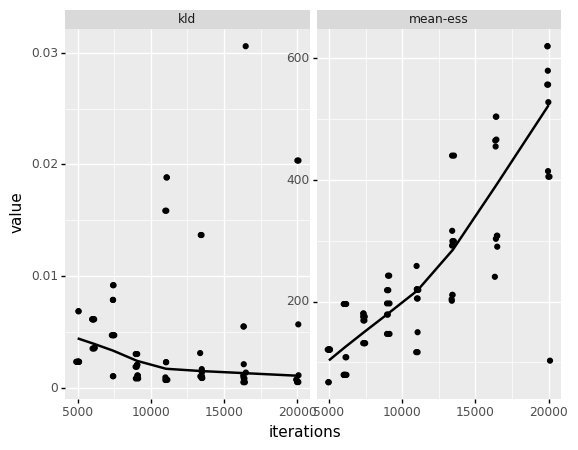

<ggplot: (8759690728328)>

In [22]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

Example run of results.

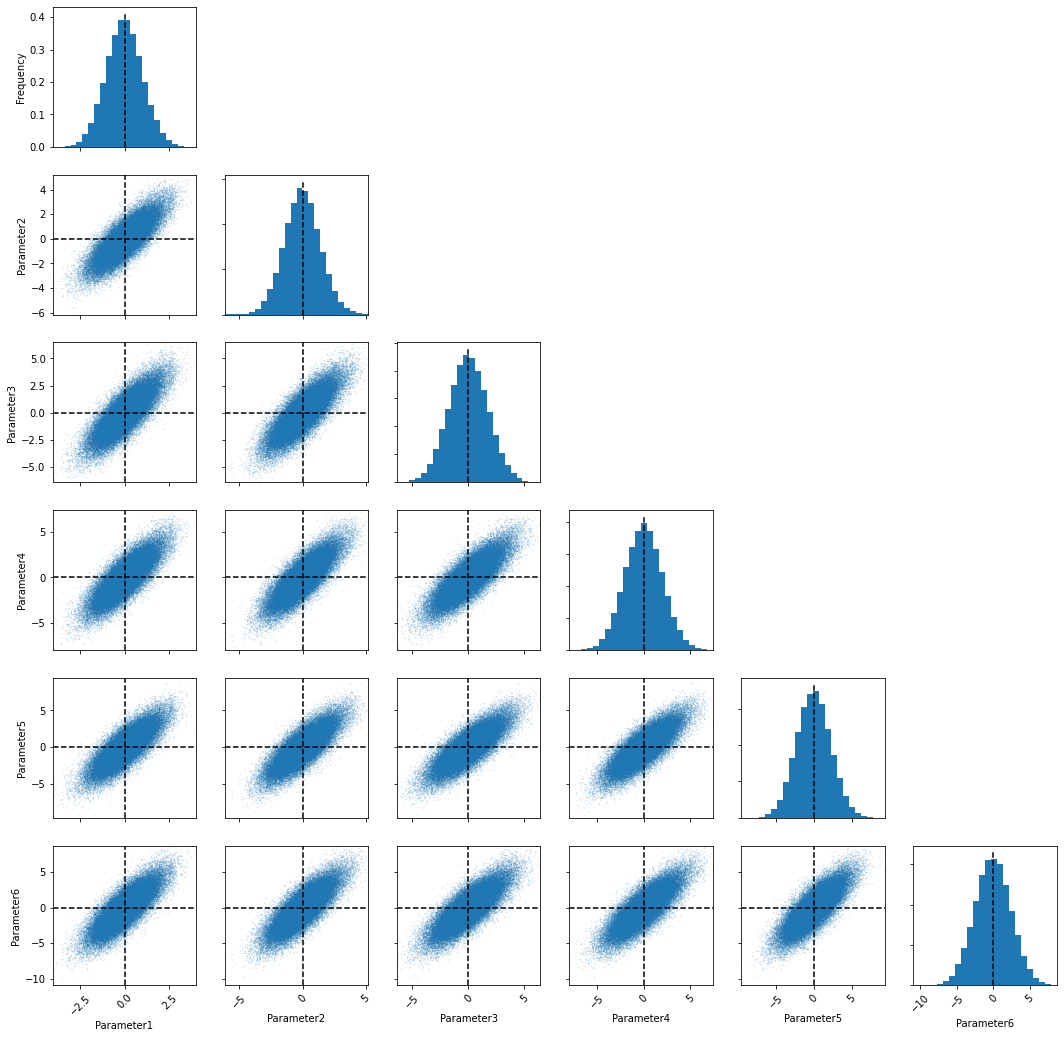

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess      ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -------  --------------
param 1  -0.01   1.01    -1.97   -0.69  -0.02  0.67   2.00     1.00    1713.02  12.06
param 2  -0.02   1.43    -2.81   -0.99  -0.03  0.92   2.82     1.00    1623.73  11.43
param 3  -0.01   1.74    -3.38   -1.19  -0.03  1.17   3.46     1.00    1683.28  11.85
param 4  -0.01   2.02    -3.91   -1.38  -0.00  1.35   3.99     1.00    1671.55  11.77
param 5  -0.02   2.25    -4.39   -1.55  -0.03  1.50   4.43     1.00    1626.40  11.45
param 6  -0.03   2.46    -4.82   -1.70  -0.03  1.64   4.82     1.00    1676.81  11.81


In [23]:
n_chains = 4
n_iterations = 20000
n_warmup = 5000

log_pdf = pints.toy.HighDimensionalGaussianLogPDF(dimension=6, rho=0.8)
x0 = np.random.uniform(-4, 4, size=(n_chains, 6))
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.SliceStepoutMCMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)

chains = controller.run()
chains = chains[:, n_warmup:]

# Show traces and histograms
pints.plot.pairwise(np.vstack(chains), kde=False, ref_parameters=([0] * 6))

# Show graphs
plt.show()

results = pints.MCMCSummary(chains=chains, time=controller.time())
print(results)

Again the estimated means compare well with the theoretical. Now comparing the theoretical and empirical cdfs: again, these look fine.

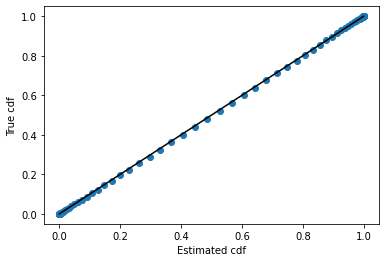

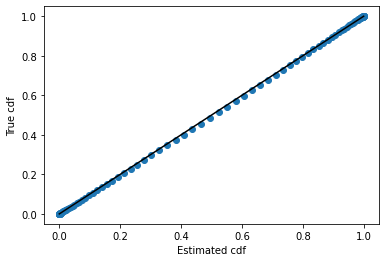

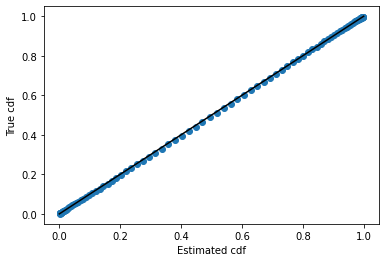

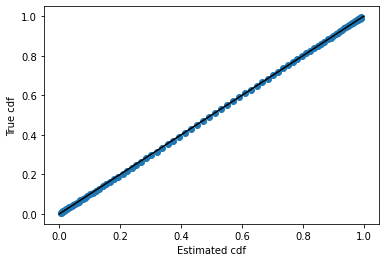

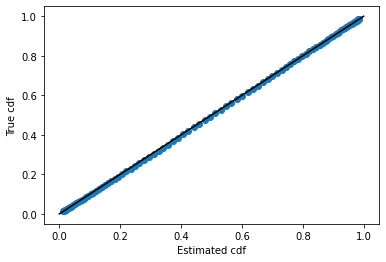

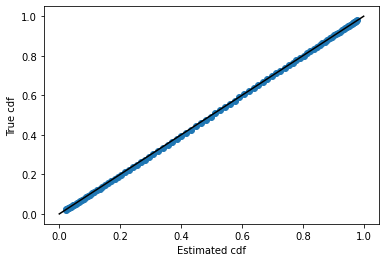

[None, None, None, None, None, None]

In [24]:
draws = np.vstack(chains)
[ecdf_norm_plotter(draws[:, i], np.sqrt(i + 1)) for i in range(6)]

# Banana

In [13]:
test = run_replicates(np.geomspace(6000, 20000, 8), 10, test_slice_stepout_on_banana, parallel=True)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
# df.to_csv("experimental_data/slice_stepout_banana.csv")

/auto/users/huiarm/PINTS/method-merge-tests/venv/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


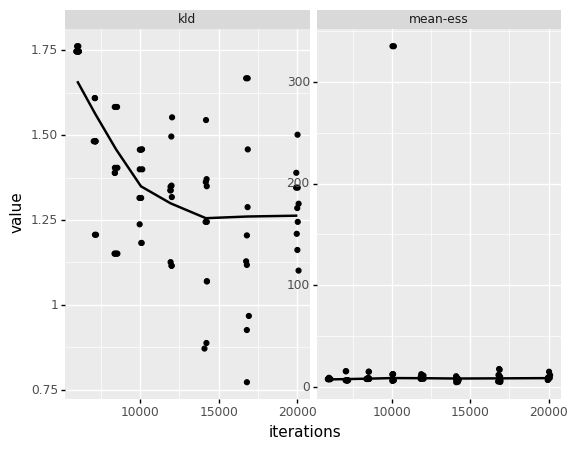

<ggplot: (8729882259252)>

In [14]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

The banana is a hard problem with a low ESS. But the KLD is moving in the right direction.

Example run of results.

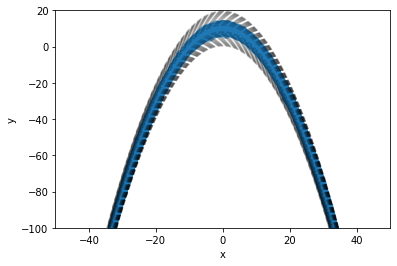

In [15]:
n_chains = 4
n_iterations = 20000
n_warmup = 5000

log_pdf = pints.toy.TwistedGaussianLogPDF(dimension=2, b=0.1)
log_prior = pints.MultivariateGaussianLogPrior([0, 0],
                                               [[10, 0], [0, 10]])
x0 = log_prior.sample(n_chains)
sigma0 = np.diag(np.array([1, 3]))

levels = np.linspace(-50, -1, 20)
x = np.linspace(-50, 50, 250)
y = np.linspace(-100, 20, 250)
X, Y = np.meshgrid(x, y)
Z = [[log_pdf([i, j]) for i in x] for j in y]

# run model
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.SliceStepoutMCMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)

chains = controller.run()
chains = np.vstack(chains[:, n_warmup:])

plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.2)
plt.scatter(chains[:, 0], chains[:, 1], alpha=0.2)
plt.xlim(-50, 50)
plt.ylim(-100, 20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Annulus

In [16]:
test = run_replicates(np.geomspace(3000, 10000, 8), 10,
                      test_slice_stepout_on_annulus)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
# df.to_csv("experimental_data/slice_stepout_annulus.csv")

/auto/users/huiarm/PINTS/method-merge-tests/venv/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


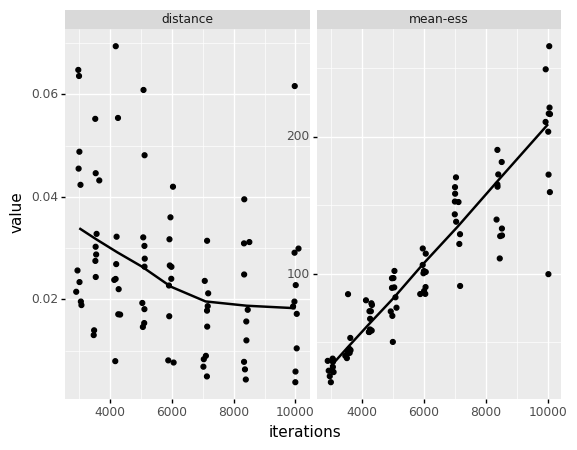

<ggplot: (8729881962198)>

In [17]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

The draws trend closer to convergence as the number of iterations increases, although the effective sample size is low here.

Example run.

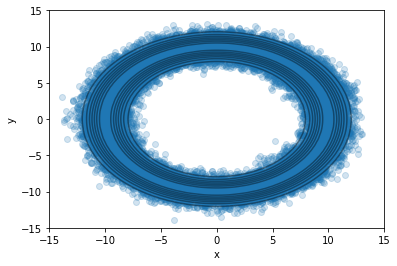

In [18]:
n_chains = 4
n_iterations = 10000
n_warmup = 2000

log_pdf = pints.toy.AnnulusLogPDF()
x0 = log_pdf.sample(n_chains)

# run model
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.SliceStepoutMCMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)

chains = controller.run()
chains = np.vstack(chains[:, n_warmup:])

num_points = 100
x = np.linspace(-15, 15, num_points)
y = np.linspace(-15, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z, colors='k', alpha=0.4)
plt.scatter(chains[:, 0], chains[:, 1], alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Multimodal Gaussian

In [3]:
test = run_replicates(np.geomspace(6000, 20000, 8), 10,
                      test_slice_stepout_on_multimodal_gaussian, parallel=True)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
# df.to_csv("experimental_data/slice_stepout_multimodal_gaussian.csv")

# remove high values of kld to see general trend
test1 = test.query('kld < 1')
df1 = pd.melt(test1, id_vars=['iterations', 'replicate'])

/auto/users/huiarm/PINTS/method-merge-tests/venv/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


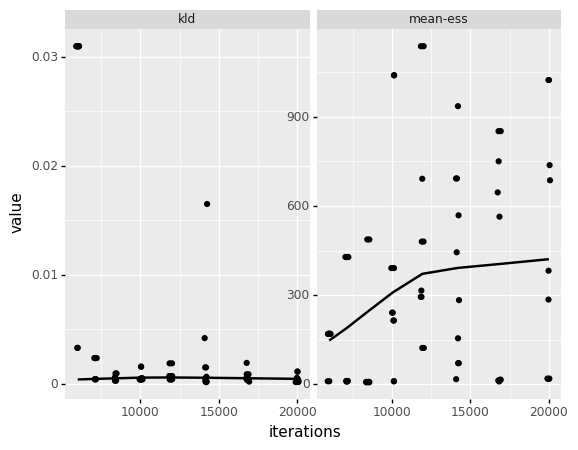

<ggplot: (8788178897580)>

In [4]:
(ggplot(df1,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

With the few outliers removed, the KLD appears to be moving in the correct direction as iterations increase.

/auto/users/huiarm/PINTS/method-merge-tests/venv/lib/python3.8/site-packages/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


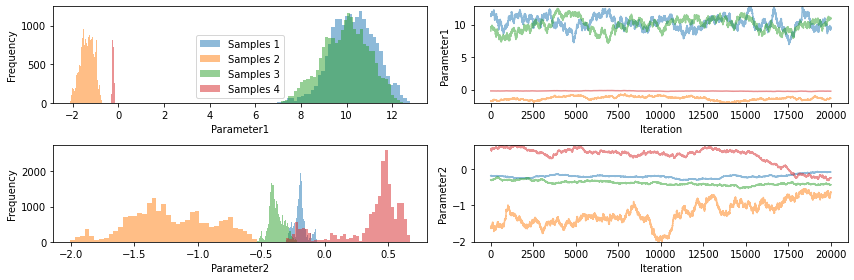

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess    ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -----  --------------
param 1  4.66    5.52    -1.76   -0.41  3.39   10.14  11.72    8.34    65.91  0.32
param 2  -0.35   0.61    -1.59   -0.53  -0.28  -0.13  0.60     3.93    22.89  0.11


In [5]:
n_chains = 4
n_iterations = 20000
n_warmup = 5000

covariances = [[[1, 0], [0, 1]],
               [[2, 0.8], [0.8, 3]],
               [[1, -0.5], [-0.5, 1]]]
log_pdf = pints.toy.MultimodalGaussianLogPDF(modes=[[0, 0], [5, 10], [10, 0]],
                                             covariances=covariances)
x0 = log_pdf.sample(n_chains)

# run model
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.MonomialGammaHamiltonianMCMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)

chains = controller.run()

pints.plot.trace(chains)

# Show graphs
plt.show()

results = pints.MCMCSummary(chains=chains, time=controller.time())
print(results)

Clearly this multimodal distribution requires many draws to reach convergence.

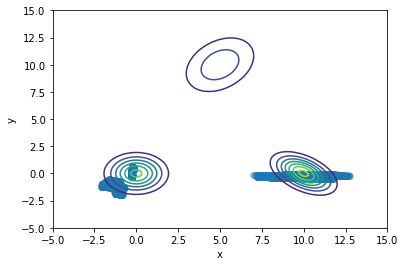

In [6]:
samples = np.vstack(chains[:, n_warmup:])

num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.scatter(samples[:,0], samples[:,1], alpha=0.05)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cone

In [7]:
test = run_replicates(np.geomspace(1000, 10000, 8), 10,
                      test_slice_stepout_on_cone, parallel=True)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
# df.to_csv("experimental_data/slice_stepout_cone.csv")

/auto/users/huiarm/PINTS/method-merge-tests/venv/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


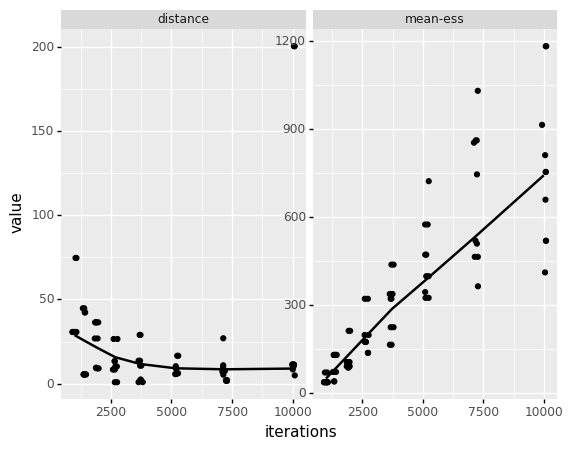

<ggplot: (8788178558799)>

In [8]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

Again, the cone problem, with its long tails, is really hard.

Now showing an example run.

Running...
Using Slice Sampling - Stepout
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     4       0:00.0
1     420     0:00.0
2     836     0:00.0
3     1160    0:00.0
20    5440    0:00.0
40    11520   0:00.1
60    16868   0:00.1
80    22360   0:00.2
100   28704   0:00.2
120   34048   0:00.2
140   40224   0:00.3
160   46236   0:00.3
180   52612   0:00.4
200   58684   0:00.4
220   64180   0:00.4
240   70120   0:00.5
260   75820   0:00.5
280   81484   0:00.5
300   87504   0:00.6
320   94060   0:00.6
340   100128   0:00.7
360   106180   0:00.7
380   112196   0:00.7
400   118800   0:00.8
420   125668   0:00.8
440   131780   0:00.9
460   138060   0:00.9
480   144108   0:00.9
500   150676   0:01.0
520   156744   0:01.0
540   163312   0:01.1
560   170080   0:01.1
580   176384   0:01.1
600   182580   0:01.2
620   189608   0:01.2
640   196160   0:01.3
660   202464   0:01.3
680   208296   0:01.4
700   214716   0:01.4
720   221176   0:01.4
740   227360   0:01.5
760   

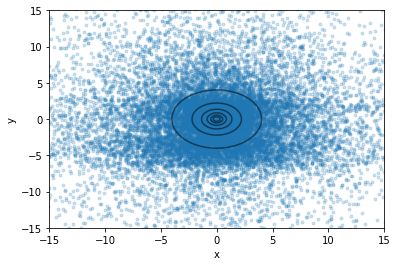

True normed mean = 8.638816024714002
Sample normed mean = 7.958621755928249
True normed var = 65.40423915068341
Sample normed var = 56.16647888147649


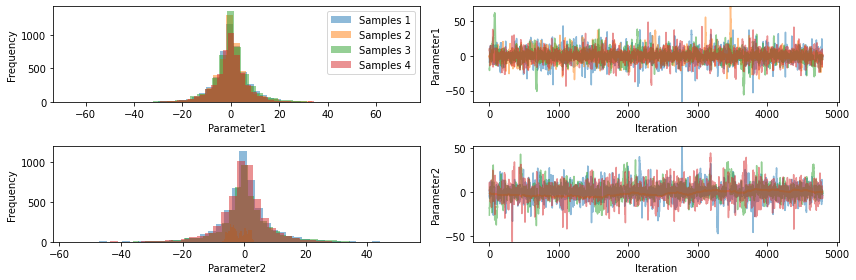

In [9]:
nchains = 4
log_pdf = pints.toy.ConeLogPDF(dimensions=2, beta=0.6)
x0 = log_pdf.sample(nchains)
mcmc = pints.MCMCController(log_pdf, nchains, x0, method=pints.SliceStepoutMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(5000)

# Disable logging
mcmc.set_log_to_screen(True)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Check convergence and other properties of chains
results = pints.MCMCSummary(chains=chains, time=mcmc.time(),
                            parameter_names=['mean dim 1', 'mean dim 2'])
print(results)

# Discard warm-up
chains = [chain[200:] for chain in chains]
stacked = np.vstack(chains)

# overlay draws on contours
num_points = 100
x = np.linspace(-15, 15, num_points)
y = np.linspace(-15, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

d = list(map(lambda x: np.linalg.norm(x), stacked))
a_mean = np.mean(d)
a_var = np.var(d)

print("True normed mean = " + str(log_pdf.mean_normed()))
print("Sample normed mean = " + str(a_mean))

print("True normed var = " + str(log_pdf.var_normed()))
print("Sample normed var = " + str(a_var))

# Show traces and histograms
pints.plot.trace(chains)
plt.show()

# High dimensional Gaussian

In [11]:
test = run_replicates(np.geomspace(1000, 10000, 8), 10,
                      test_slice_stepout_on_high_dim_gaussian, parallel=True)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
# df.to_csv("experimental_data/slice_stepout_high_dim_gaussian.csv")

/auto/users/huiarm/PINTS/method-merge-tests/venv/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


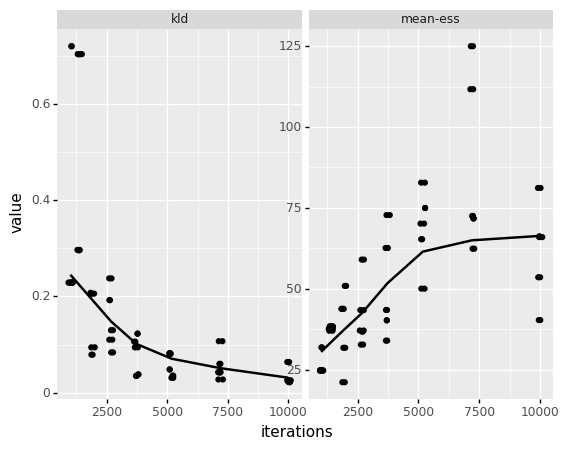

<ggplot: (8788133004005)>

In [12]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))